In [19]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm

In [20]:
liar_df = pd.read_csv('../liar_dataset/liar.csv', usecols=['statement', 'label'])
liar_df = liar_df[liar_df['statement'].str.len() <= 514]
liar_df

,label,statement
0,0,Building a wall on the U.S.-Mexico border will...
1,1,Wisconsin is on pace to double the number of l...
2,1,Says John McCain has done nothing to help the ...
3,0,Suzanne Bonamici supports a plan that will cut...
4,1,When asked by a reporter whether hes at the ce...
...,...,...
12760,0,"For the first time in more than a decade, impo..."
12761,0,Says Donald Trump has bankrupted his companies...
12762,0,"John McCain and George Bush have ""absolutely n..."
12763,1,A new poll shows 62 percent support the presid...


Model output: 0 -> Negative; 1 -> Neutral; 2 -> Positive

In [31]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example list of news articles
articles = [
    "The company reported strong earnings this quarter, boosting investor confidence.",
    "Despite earlier gains, the market closed in the red due to inflation concerns.",
    "New regulations are expected to hurt the profitability of many tech companies.",
    "Experts predict a stable growth trajectory in the next fiscal year."
]

# Analyze each article
results = []
for article in liar_df['statement'].tolist():
    sentiment = nlp(article)[0]  # Get the first (and only) result
    results.append({
        "text": article,
        "label": sentiment["label"],
        "score": sentiment["score"]
    })

# Save to DataFrame
df = pd.DataFrame(results)

# Display
df

Device set to use cpu


,text,label,score
0,Building a wall on the U.S.-Mexico border will...,LABEL_0,0.680029
1,Wisconsin is on pace to double the number of l...,LABEL_1,0.561685
2,Says John McCain has done nothing to help the ...,LABEL_0,0.783723
3,Suzanne Bonamici supports a plan that will cut...,LABEL_1,0.608443
4,When asked by a reporter whether hes at the ce...,LABEL_1,0.853304
...,...,...,...
12754,"For the first time in more than a decade, impo...",LABEL_1,0.635008
12755,Says Donald Trump has bankrupted his companies...,LABEL_0,0.727654
12756,"John McCain and George Bush have ""absolutely n...",LABEL_0,0.651887
12757,A new poll shows 62 percent support the presid...,LABEL_2,0.705863


In [32]:
df['lbl'] = liar_df['label']
#df['label'] = df['label'].map({'LABEL_0' : 0, 'LABEL_1' : 1, 'LABEL_2' : 2})
df

,text,label,score,lbl
0,Building a wall on the U.S.-Mexico border will...,LABEL_0,0.680029,0.0
1,Wisconsin is on pace to double the number of l...,LABEL_1,0.561685,1.0
2,Says John McCain has done nothing to help the ...,LABEL_0,0.783723,1.0
3,Suzanne Bonamici supports a plan that will cut...,LABEL_1,0.608443,0.0
4,When asked by a reporter whether hes at the ce...,LABEL_1,0.853304,1.0
...,...,...,...,...
12754,"For the first time in more than a decade, impo...",LABEL_1,0.635008,0.0
12755,Says Donald Trump has bankrupted his companies...,LABEL_0,0.727654,0.0
12756,"John McCain and George Bush have ""absolutely n...",LABEL_0,0.651887,1.0
12757,A new poll shows 62 percent support the presid...,LABEL_2,0.705863,1.0


In [38]:
df = df[df['lbl'].isna() == False]
df

,text,label,score,lbl
0,Building a wall on the U.S.-Mexico border will...,LABEL_0,0.680029,0.0
1,Wisconsin is on pace to double the number of l...,LABEL_1,0.561685,1.0
2,Says John McCain has done nothing to help the ...,LABEL_0,0.783723,1.0
3,Suzanne Bonamici supports a plan that will cut...,LABEL_1,0.608443,0.0
4,When asked by a reporter whether hes at the ce...,LABEL_1,0.853304,1.0
...,...,...,...,...
12754,"For the first time in more than a decade, impo...",LABEL_1,0.635008,0.0
12755,Says Donald Trump has bankrupted his companies...,LABEL_0,0.727654,0.0
12756,"John McCain and George Bush have ""absolutely n...",LABEL_0,0.651887,1.0
12757,A new poll shows 62 percent support the presid...,LABEL_2,0.705863,1.0


In [39]:
df.isna().sum()

text     0
label    0
score    0
lbl      0
dtype: int64

In [45]:
df.to_csv('../liar_dataset/liar sentiment.csv', index=False)

In [49]:
df['label']=df['label'].map({'LABEL_0':0,'LABEL_1':1,'LABEL_2':2})
df

C:\Users\stefa\AppData\Local\Temp\ipykernel_2468\1693977466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df['label'].map({'LABEL_0':0,'LABEL_1':1,'LABEL_2':2})


,text,label,score,lbl
0,Building a wall on the U.S.-Mexico border will...,0,0.680029,0.0
1,Wisconsin is on pace to double the number of l...,1,0.561685,1.0
2,Says John McCain has done nothing to help the ...,0,0.783723,1.0
3,Suzanne Bonamici supports a plan that will cut...,1,0.608443,0.0
4,When asked by a reporter whether hes at the ce...,1,0.853304,1.0
...,...,...,...,...
12754,"For the first time in more than a decade, impo...",1,0.635008,0.0
12755,Says Donald Trump has bankrupted his companies...,0,0.727654,0.0
12756,"John McCain and George Bush have ""absolutely n...",0,0.651887,1.0
12757,A new poll shows 62 percent support the presid...,2,0.705863,1.0


In [52]:
df['lbl'] = df['lbl'].astype('int64')
df

C:\Users\stefa\AppData\Local\Temp\ipykernel_2468\2770738075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lbl'] = df['lbl'].astype('int64')


,text,label,score,lbl
0,Building a wall on the U.S.-Mexico border will...,0,0.680029,0
1,Wisconsin is on pace to double the number of l...,1,0.561685,1
2,Says John McCain has done nothing to help the ...,0,0.783723,1
3,Suzanne Bonamici supports a plan that will cut...,1,0.608443,0
4,When asked by a reporter whether hes at the ce...,1,0.853304,1
...,...,...,...,...
12754,"For the first time in more than a decade, impo...",1,0.635008,0
12755,Says Donald Trump has bankrupted his companies...,0,0.727654,0
12756,"John McCain and George Bush have ""absolutely n...",0,0.651887,1
12757,A new poll shows 62 percent support the presid...,2,0.705863,1


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#take splittig function
from sklearn.model_selection import train_test_split
#import ML models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#import metrics for evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [87]:
Y = df['lbl']
x = df.drop(columns= ['lbl', 'text'])

In [88]:
Y.shape

(8481,)

In [89]:
x

,neg,neu,pos,compound
1,0.000,0.894,0.106,0.0772
2,0.201,0.799,0.000,-0.3089
3,0.135,0.577,0.288,0.3400
4,0.242,0.659,0.099,-0.5994
5,0.000,0.894,0.106,0.3818
...,...,...,...,...
12745,0.000,0.789,0.211,0.3400
12746,0.205,0.795,0.000,-0.4767
12750,0.172,0.828,0.000,-0.3597
12751,0.000,0.831,0.169,0.7096


In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6784, 4), (1697, 4), (6784,), (1697,))

In [91]:
def computeMetrics(y_test, Y_predict_test):
    accuracy_lgbm = accuracy_score(y_test, Y_predict_test)
    print('Accuracy is: ', accuracy_lgbm)
    precision_lgbm = precision_score(y_test, Y_predict_test)
    recall_lgbm = recall_score(y_test, Y_predict_test)
    print('Precision is: ', precision_lgbm)
    print('Recall is: ', recall_lgbm)
    roc_auc_test = roc_auc_score(y_test, Y_predict_test)
    print('AUC is: ', roc_auc_test)

def confusionMatrix(y_test, Y_predict_test):
    cm_lgbm = confusion_matrix(y_test, Y_predict_test)
    #visualise confusion matrix
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.heatmap(cm_lgbm, annot = True, fmt = 'd') #with annotations formatted as decimal
    plt.show()

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
Y_predict_test = lr.predict(X_test)
computeMetrics(y_test, Y_predict_test)

Accuracy is:  0.568650559811432
Precision is:  0.0
Recall is:  0.0
AUC is:  0.4994824016563147


In [93]:
lgbm = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, verbose = -1, random_state=10)
#learning rate is the hillclimbing step in minimizing error function
#verbose = -1 disables verbose logging of all trees states
#training the model
lgbm.fit(X_train, y_train)
Y_predict_test = lgbm.predict(X_test)
computeMetrics(y_test, Y_predict_test)

Accuracy is:  0.5545079552150854
Precision is:  0.4517374517374517
Recall is:  0.1600547195622435
AUC is:  0.5065283949778091


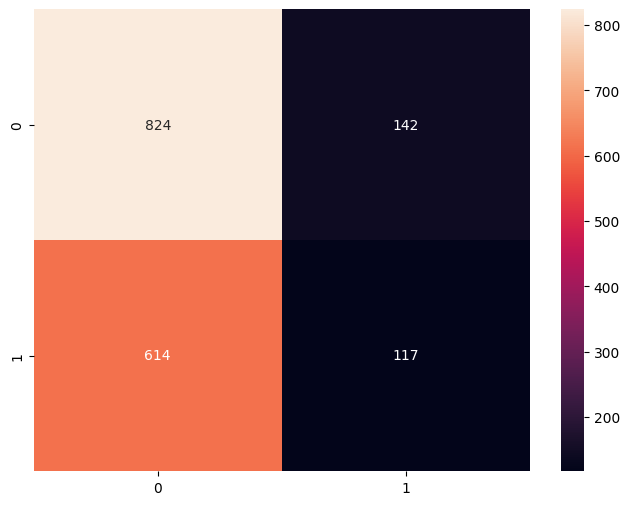

In [94]:
confusionMatrix(y_test, Y_predict_test)

In [95]:
#tuning the model by trying different combinations of hyperparameters
n_estimators = [200, 500, 900, 1200]
max_depths = [4, 5, 8, 10]
learning_rates = [0.01, 0.1, 0.2, 0.3]

In [96]:
#trying all combinations here and saving them in a dataframe called results
results = []
for estimator in n_estimators:
  for depth in max_depths:
    for rate in learning_rates:
      lgbm = LGBMClassifier(n_estimators=estimator, max_depth=depth, learning_rate=rate,
                            n_jobs = -1, verbose = -1, random_state = 10,
                            subsample = 0.6, colsample_bytree = 0.5)
      #fitting each model
      lgbm.fit(X_train, y_train)
      #running propensity models
      y_predict_test = lgbm.predict_proba(X_test)[:, 1]
      y_predict_train = lgbm.predict_proba(X_train)[:, 1]
      #computing auc scores for each
      auc_score_train = roc_auc_score(y_train, y_predict_train)
      auc_score_test = roc_auc_score(y_test, y_predict_test)
      #adding to results
      results.append({
          'n_estimators' : estimator,
          'max_depth' : depth,
          'learning_rate' : rate,
          'auc_train' : auc_score_train,
          'auc_test' : auc_score_test,
          'auc_diff' : auc_score_train-auc_score_test

      })
results_df = pd.DataFrame(results)

In [97]:
#sorting by the auc test result
results_df.sort_values(by = 'auc_test', ascending = False).head(20)

,n_estimators,max_depth,learning_rate,auc_train,auc_test,auc_diff
0,200,4,0.01,0.602706,0.518539,0.084167
20,500,5,0.01,0.656127,0.517227,0.138899
2,200,4,0.20,0.716129,0.516931,0.199197
10,200,8,0.20,0.778850,0.516433,0.262417
36,900,5,0.01,0.682983,0.515614,0.167369
52,1200,5,0.01,0.695773,0.515402,0.180371
5,200,5,0.10,0.710870,0.515287,0.195583
4,200,5,0.01,0.624568,0.515215,0.109354
16,500,4,0.01,0.631735,0.514843,0.116892
8,200,8,0.01,0.660578,0.514834,0.145744


In [66]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...


True

In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [71]:

results = []
for article in tqdm(df['text']):
    row = {'text':article}
    row.update(sia.polarity_scores(article))
    results.append(row)

vader_df = pd.DataFrame(results)
vader_df

100%|██████████████████████████████████████████████████████████████████████████| 12753/12753 [00:02<00:00, 4915.03it/s]


,text,neg,neu,pos,compound
0,Building a wall on the U.S.-Mexico border will...,0.000,1.000,0.000,0.0000
1,Wisconsin is on pace to double the number of l...,0.000,0.894,0.106,0.0772
2,Says John McCain has done nothing to help the ...,0.201,0.799,0.000,-0.3089
3,Suzanne Bonamici supports a plan that will cut...,0.135,0.577,0.288,0.3400
4,When asked by a reporter whether hes at the ce...,0.242,0.659,0.099,-0.5994
...,...,...,...,...,...
12748,"For the first time in more than a decade, impo...",0.000,1.000,0.000,0.0000
12749,Says Donald Trump has bankrupted his companies...,0.000,1.000,0.000,0.0000
12750,"John McCain and George Bush have ""absolutely n...",0.172,0.828,0.000,-0.3597
12751,A new poll shows 62 percent support the presid...,0.000,0.831,0.169,0.7096


In [74]:
vader_df['lbl'] = df['lbl']


,text,neg,neu,pos,compound,lbl
0,Building a wall on the U.S.-Mexico border will...,0.000,1.000,0.000,0.0000,0.0
1,Wisconsin is on pace to double the number of l...,0.000,0.894,0.106,0.0772,1.0
2,Says John McCain has done nothing to help the ...,0.201,0.799,0.000,-0.3089,1.0
3,Suzanne Bonamici supports a plan that will cut...,0.135,0.577,0.288,0.3400,0.0
4,When asked by a reporter whether hes at the ce...,0.242,0.659,0.099,-0.5994,1.0
...,...,...,...,...,...,...
12748,"For the first time in more than a decade, impo...",0.000,1.000,0.000,0.0000,1.0
12749,Says Donald Trump has bankrupted his companies...,0.000,1.000,0.000,0.0000,1.0
12750,"John McCain and George Bush have ""absolutely n...",0.172,0.828,0.000,-0.3597,1.0
12751,A new poll shows 62 percent support the presid...,0.000,0.831,0.169,0.7096,0.0


In [79]:
vader_df = vader_df[vader_df['lbl'].isna() == False]

In [82]:
vader_df = vader_df[vader_df['compound'] != 0]

In [83]:
vader_df['lbl'] = vader_df['lbl'].astype('int64')
vader_df

,text,neg,neu,pos,compound,lbl
1,Wisconsin is on pace to double the number of l...,0.000,0.894,0.106,0.0772,1
2,Says John McCain has done nothing to help the ...,0.201,0.799,0.000,-0.3089,1
3,Suzanne Bonamici supports a plan that will cut...,0.135,0.577,0.288,0.3400,0
4,When asked by a reporter whether hes at the ce...,0.242,0.659,0.099,-0.5994,1
5,Over the past five years the federal governmen...,0.000,0.894,0.106,0.3818,0
...,...,...,...,...,...,...
12745,Says U.S. Rep. Charles Bass wants to privatize...,0.000,0.789,0.211,0.3400,0
12746,More Americans believe the moon landing was fa...,0.205,0.795,0.000,-0.4767,0
12750,"John McCain and George Bush have ""absolutely n...",0.172,0.828,0.000,-0.3597,1
12751,A new poll shows 62 percent support the presid...,0.000,0.831,0.169,0.7096,0


In [84]:
vader_df.to_csv('../liar_dataset/liar vader.csv', index=False)

In [85]:
df = vader_df